In [1]:
import pickle
import numpy as np

- `Import All Necessary Things`

In [14]:
with open('./Word_to_idx.pkl','rb') as f:
    word_to_idx = pickle.load(f)
    
with open('./Idx_to_word.pkl','rb') as f:
    idx_to_word = pickle.load(f)
    
with open('./Encoded features/encoded_test_feature.pkl','rb') as f:
    encoding_test = pickle.load(f)

- `Import Model`

In [9]:
from keras.models import load_model
from keras.preprocessing.sequence import pad_sequences

In [4]:
model = load_model('./model_weights/model_10.h5')

### Predictions

In [12]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [8]:
max_length = 33

In [19]:
def predict_caption(caption):
    
    in_text = '<start>'
    for i in range(max_length):
        sequence = [word_to_idx[word] for word in in_text.split() if word in word_to_idx]
        sequence = pad_sequences([sequence],maxlen=max_length,value=0,padding='post')
        
        ypred = model.predict([photo,sequence])
        ypred = np.argmax(ypred)
        word = idx_to_word[ypred]
        in_text += (' '+word)
        
        if word == '<end>':
            break
            
    final_caption = in_text.split()[1:-1]
    final_caption = ' '.join(final_caption)
        
    return final_caption

girl in red shirt and black scarf is riding unicycle on the street with his arms raised on the handles of the street with lot of people behind him on the right


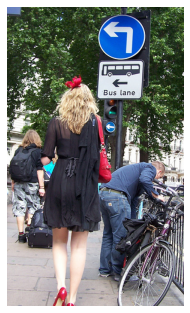

in the snow with his arms around the air and the background behind him is falling out of the ice and others walk behind him in the background and the ice skate


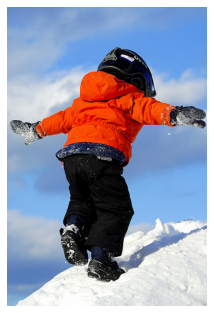

on bike in the woods of the woods on the side of the side of the two wheel and one wheel on the ground and another man watches on the ground in


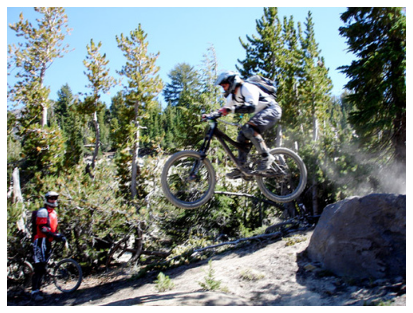

brown dog is running on the grass with his tongue hanging on the grass and the brown dog is running on the grass with his tongue hanging on the ground while the


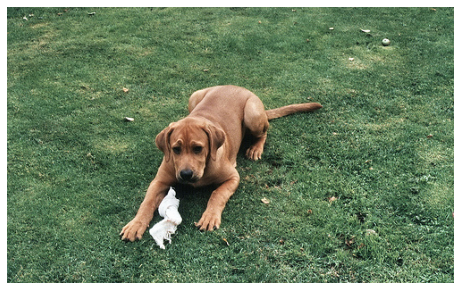

girl in the backyard is holding up her arms and holding her arms crossed the second of the camera and another boy in the foreground is holding the of the flowers and


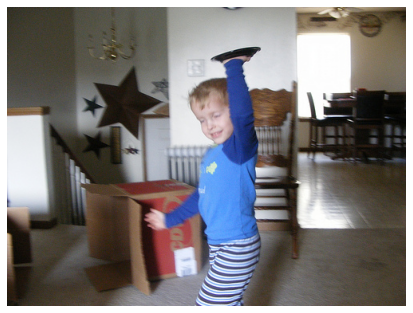

girl in overalls dress is sitting on the grass with pen in her hand and pen on her arm and pen on her arm and pen and pen on her mouth and


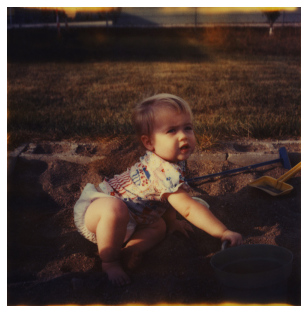

child in the snow with his or on his or is wearing black jacket and black jacket and is standing in the snow and another man stands behind him in the snow


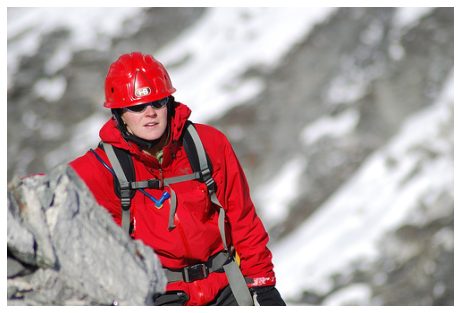

in the water with stick in its mouth while the dog is running through the leaves with his tongue hanging in the dry and the water in the dry with the water


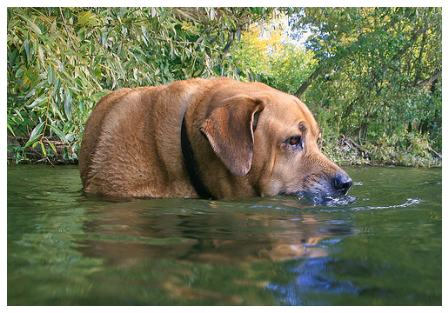

over the beach near the beach and another girl looks like he is on the beach is jumping into the air to the beach is to fetch to the right of the


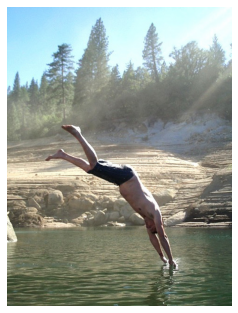

player in the air is bowling the puck in the air while others watch from by the others watch from by the others watch from by the others watch from by the


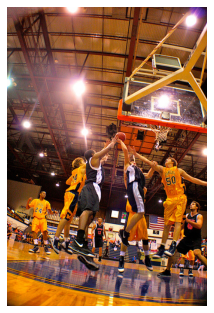

the same little girl in the midst of the water and another man looks at the other behind him in the midst of the background and the others watch him on the


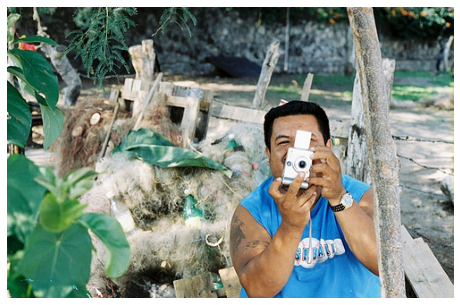

in the water at the beach with boats boats in the middle of the boats are gliding on the beach on the beach boats by the boats are pulled by the boats


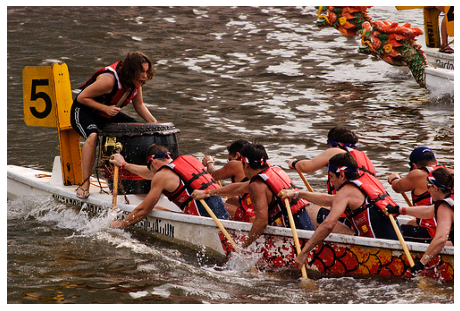

people are walking around building with giant painted in the background and one of them points to the ground in the background and the others watch him on the phone in the


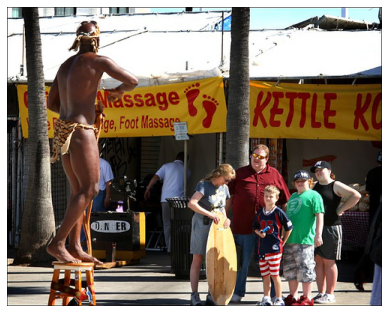

man in black shirt and black hat stands in front of brick wall with his arms crossed and other people in the background and their backs on the phone and the other


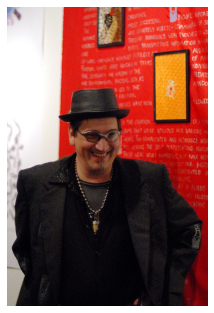

girl in red shirt and jeans is sitting on the floor of an area with tile and pair painted on the floor of the water and the others is sitting on the


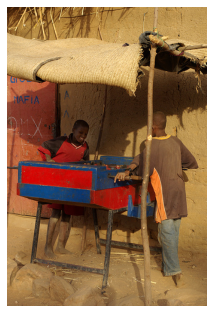

In [20]:
for i in range(15):
    idx = np.random.randint(1,1000)
    images = list(encoding_test.keys())
    img = images[idx]
    photo = encoding_test[img].reshape((1,2048))
    
    caption = predict_caption(photo)
    image = plt.imread('../Dataset/Flickr8k/Images/'+img)
    print(caption)
    plt.imshow(image)
    plt.axis('off')
    plt.show()

1000